<a href="https://colab.research.google.com/github/maryam-haseeb/CodSoft/blob/main/TASK_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Modules**

In [1]:
# importing numpy library, it is use to create numpy arrays
import numpy as np
# importing panda library, it is use to create data frames
import pandas as pd
# importing matplot library, it is use to plot graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**Data Collection**

In [2]:
#loading data to pandas dataframe from csv file
titanic_data = pd.read_csv('/content/tested.csv')

**Data Processing**


In [3]:
#display 5 rows of dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#checking number of rows and columns in the given dataset
titanic_data.shape

(418, 12)

In [5]:
#checking the basic information of given data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Missing Values**

In [6]:
#checking the missing values in each column
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#dropping cabin column as it has the most missing values
titanic_data = titanic_data.drop(columns='Cabin', axis=1)


In [8]:
#replacing missing values of age column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


In [9]:
#checking mode value of fare column
print(titanic_data['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [10]:
print(titanic_data['Fare'].mode()[0])

7.75


In [11]:
#replacing missing values with mode values in fare column
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0], inplace=True)

In [12]:
#again checking the missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Statistical Method**

In [13]:
#checking statistical methods of given data set
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
#checking the number of people survived (1) and not survived (0)
titanic_data['Survived'].value_counts()


0    266
1    152
Name: Survived, dtype: int64

In [25]:
#checking the number of male and female
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

**Data Visualization**

In [15]:
#data visualization
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

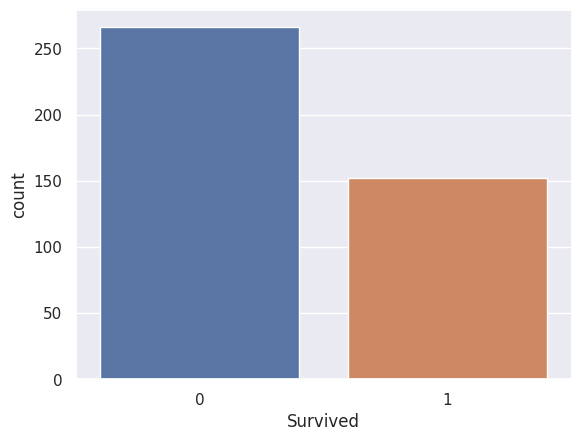

In [20]:
#plotting survived column
sns.countplot(x='Survived' , data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

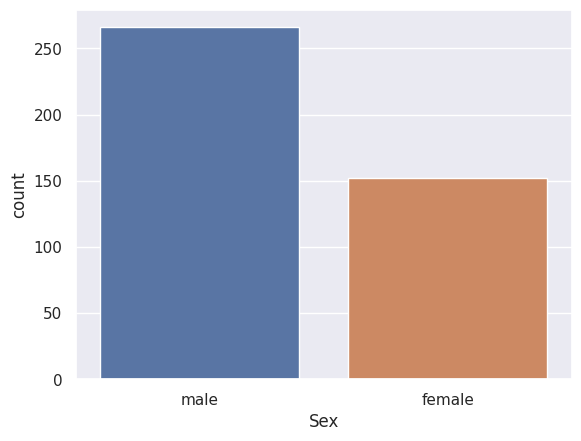

In [21]:
#plotting sex column
sns.countplot(x='Sex' , data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

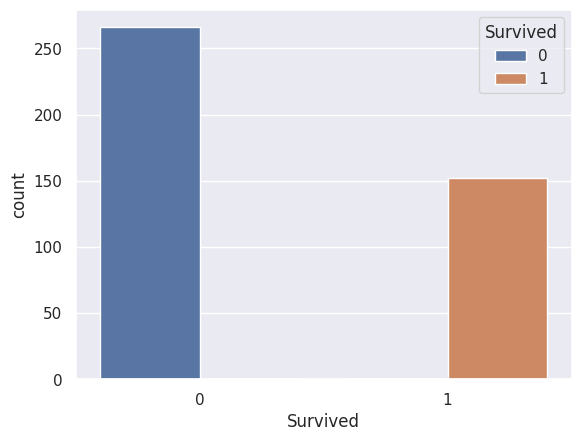

In [28]:
#calculating total number of survivors
sns.countplot(x='Survived' , hue='Survived' , data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

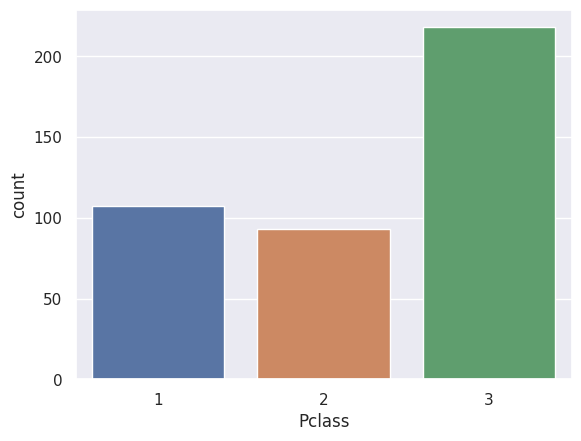

In [30]:
#plotting plclass column
sns.countplot(x='Pclass' , data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

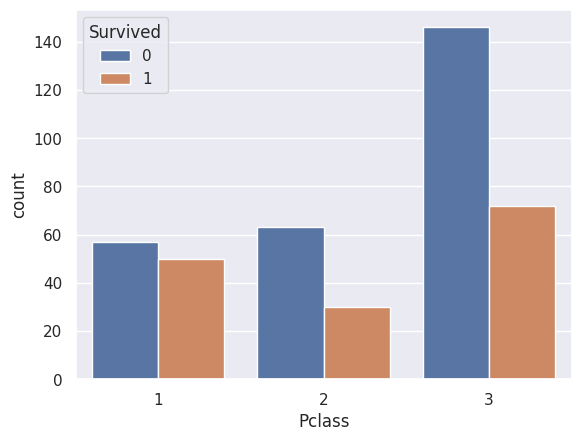

In [32]:
sns.countplot(x='Pclass' , hue='Survived' , data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

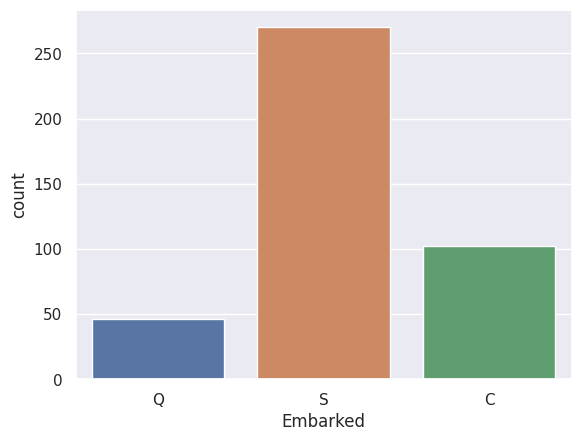

In [33]:
#plotting embarked column
sns.countplot(x='Embarked' , data=titanic_data)

(array([339.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

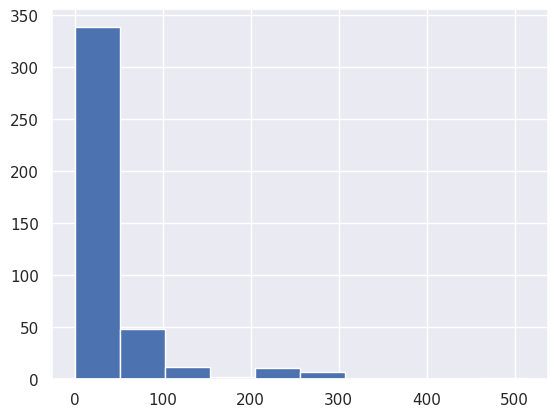

In [34]:
#numerical analysis of fare column
plt.hist(titanic_data['Fare'])

(array([ 16.,  16.,  71., 183.,  43.,  37.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

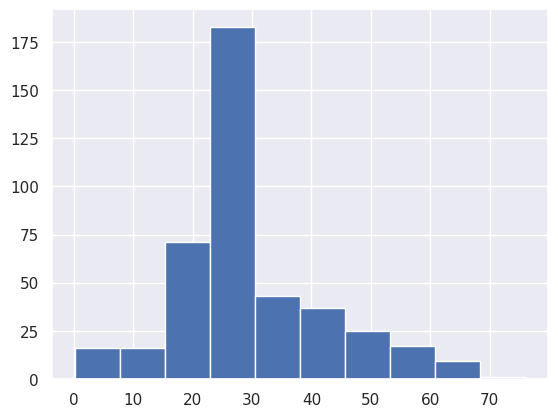

In [35]:
#numerical analysis of age column
plt.hist(titanic_data['Age'])

**Correlation Matrix**


<ipython-input-61-f859def2dd01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=titanic_data.corr()


<Axes: >

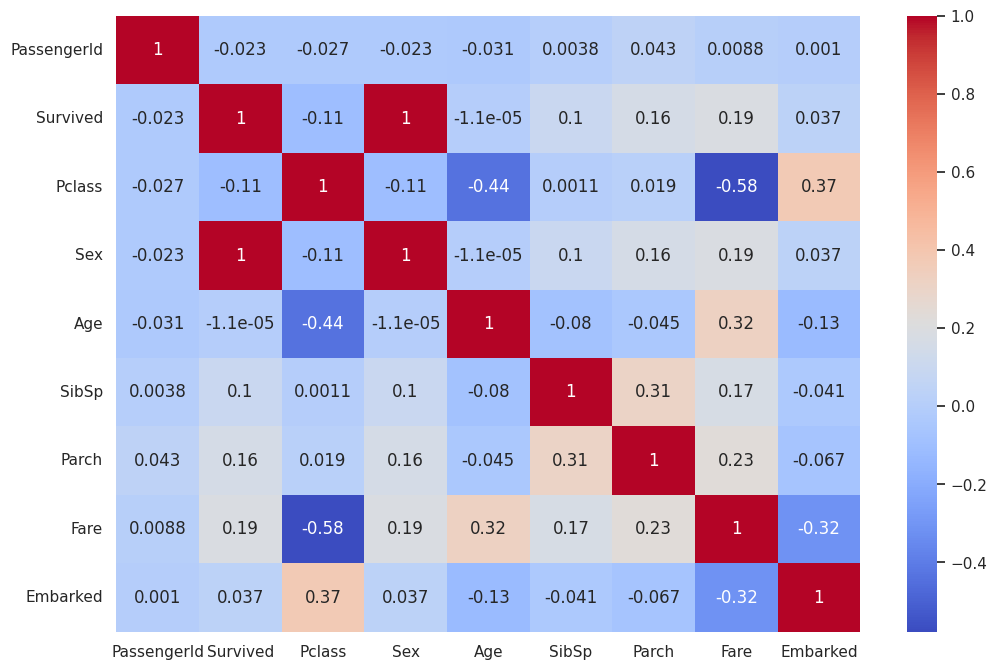

In [61]:
cor=titanic_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap='coolwarm')

**Categorical Encoding**

In [36]:
#encoding categorical columns
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [37]:
#encoding categorical columns
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [39]:
#converting the categorical column
titanic_data.replace({'Embarked':{'C':0, 'S':1, 'Q':2}, 'Sex': {'male':0, 'female':1}}, inplace= True)

In [40]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1


**Train-Test Split**





In [43]:
#separating features

A =titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
B =titanic_data['Survived']

In [44]:
print(A)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         1
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         1
4         3    1  22.00000      1      1   12.2875         1
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         1
414       1    1  39.00000      0      0  108.9000         0
415       3    0  38.50000      0      0    7.2500         1
416       3    0  30.27259      0      0    8.0500         1
417       3    0  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [45]:
print(B)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [46]:
A_train, A_test, B_train, B_test= train_test_split(A,B, test_size=0.2, random_state=2)

In [47]:
print(A.shape, A_train.shape, A_test.shape)

(418, 7) (334, 7) (84, 7)


**Model Training (We will use Logistic Regression Model)**

In [49]:
model=LogisticRegression()

In [50]:
#now we will train model
model.fit(A_train, B_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Evaluation of Model (Accuracy Score)**

In [51]:
A_train_prediction=model.predict(A_train)

In [52]:
print(A_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [53]:
training_data_accuracy=accuracy_score(A_train_prediction, B_train)

In [54]:
print('Training data accuracy score:', training_data_accuracy)

Training data accuracy score: 1.0


In [55]:
A_test_prediction=model.predict(A_test)

In [56]:
print(A_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [57]:
test_data_accuracy=accuracy_score(A_test_prediction, B_test)

In [58]:
print('Testing data accuracy score:', test_data_accuracy)

Testing data accuracy score: 1.0
